In [1]:
import cPickle as pk
import time

model = 'mnist'
ctime = time.time()
points = pk.load(open('swipe-for-untargeted-%s.pickle' % model))
print 'loading', model, 'done, using ', time.time() - ctime, 'sec.'

loading mnist done, using  15.219769001 sec.


In [2]:
data = {}
data['mnist'] = points

In [3]:
points[2550 * 1275 + 1274]

(0.0, 2.8421709430404007e-14, 2)

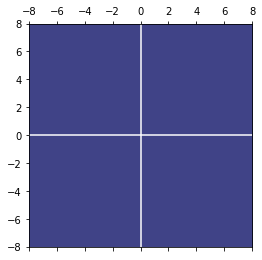

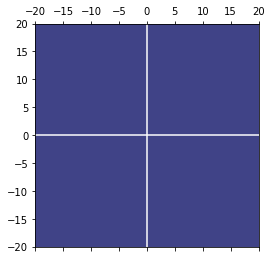

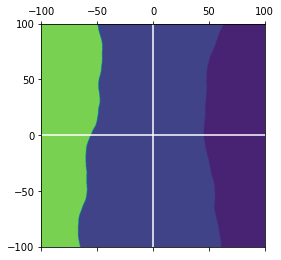

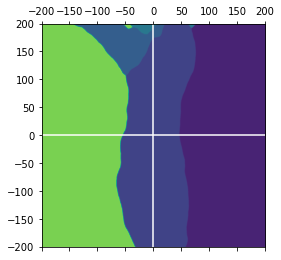

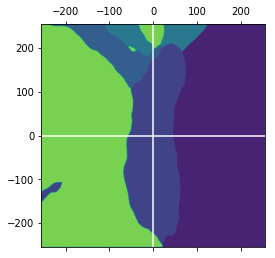

In [8]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

"""
s = set()

for model in data:
    for d in data[model]:
        s.add(d[2])

print 'size', len(s)
m = {}
m[393] = 0

for c in s:
    if c != 393:
        m[c] = len(m)
"""
m = range(10)

for model in ['mnist']:

    bound = 255 * 10
    bias = 255 * 5
    grid = [[0 for i in range(bound)] for j in range(bound)]
    for d in data[model]:
        x = int(d[0] * 5 + bias + 1e-3)
        y = int(d[1] * 5 + bias + 1e-3)
        if x >= 0 and x < bound and y >=0 and y < bound:
            grid[x][y] = m[d[2]]

    g = np.asarray([[x for x in row] for row in grid])
    middle = 255 * 5

    for bound in [40, 100, 500, 1000, middle]:
        plt.clf()
        plt.figure(figsize=(16,12))
        plt.matshow(g.T[middle - bound:middle + bound, middle - bound:middle + bound],
                    origin='lower', interpolation='bilinear', 
                    vmax=len(m), vmin=0,
                    extent=[-bound / 5.0, bound / 5.0, -bound / 5.0, bound / 5.0])
        plt.xlim(-bound / 5.0, bound / 5.0)
        plt.ylim(-bound / 5.0, bound / 5.0)
        plt.plot([0, 0], [-255, 255], color='white')
        plt.plot([-255, 255], [0, 0], color='white')
        #plt.savefig('/home/liuchang/trans-paper/image/boundary/boundary-'+model+'-targeted-'+str(bound)+'.pdf', format='pdf')
        plt.show()

